# Problem Statement

The  dataset contains information about used cars from a leading website and here you need to predict the price of the car

# Importing the Libraries 

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Importing the Data and Data Description

In [2]:
df = pd.read_csv(r'E:\ML\CAR DETAILS.csv')
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# Data Pre-processiong

In [6]:
X = df[['name','year','km_driven','fuel','seller_type','transmission','owner']]
y = df['selling_price']
X

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner


In [7]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner
3679,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2006,400000,Diesel,Individual,Manual,Third Owner
2093,Hyundai i10 Sportz 1.2 AT,2015,50000,Petrol,Dealer,Automatic,First Owner
3220,Maruti Alto 800 LXI,2019,20000,Petrol,Individual,Manual,First Owner
2422,Mahindra TUV 300 T8,2017,80000,Diesel,Individual,Manual,First Owner
1867,Maruti Wagon R VXI,2005,100000,Petrol,Individual,Manual,Third Owner
...,...,...,...,...,...,...,...
3444,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,2006,50000,Diesel,Individual,Manual,First Owner
466,Tata Indica Vista Quadrajet LX,2011,80000,Diesel,Individual,Manual,First Owner
3092,Maruti Ciaz VDi Plus SHVS,2016,51000,Diesel,Dealer,Manual,First Owner
3772,Maruti Ertiga VDI,2013,80000,Diesel,Individual,Manual,First Owner


In [10]:
X_test

,name,year,km_driven,fuel,seller_type,transmission,owner
3978,Tata Manza Aqua Quadrajet BS IV,2010,80000,Diesel,Individual,Manual,First Owner
1448,Renault KWID RXT BSIV,2019,27000,Petrol,Individual,Manual,First Owner
2664,Hyundai Santro Xing GL Plus,2008,41723,Petrol,Individual,Manual,Second Owner
17,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner
1634,Mahindra TUV 300 T8 AMT,2016,60000,Diesel,Individual,Automatic,Second Owner
...,...,...,...,...,...,...,...
572,Mercedes-Benz C-Class Progressive C 220d,2018,10000,Diesel,Dealer,Automatic,First Owner
4278,Honda Amaze S Petrol BSIV,2020,1000,Petrol,Individual,Manual,First Owner
288,Mahindra Bolero SLX,2011,90000,Diesel,Individual,Manual,Second Owner
1615,Maruti Swift Dzire VDI,2017,46507,Diesel,Trustmark Dealer,Manual,First Owner


In [11]:
y_train

3679    400000
2093    500000
3220    210000
2422    650000
1867    100000
         ...  
3444    500000
466     133000
3092    665000
3772    250999
860     175000
Name: selling_price, Length: 2907, dtype: int64

In [12]:
y_test

3978     165000
1448     250000
2664     120000
17       450000
1634     730000
         ...   
572     3800000
4278     614000
288      350000
1615     600000
2330     540000
Name: selling_price, Length: 1433, dtype: int64

# Feature Selection and Analysis

### Name

In [13]:
X_train["name"].value_counts()

Maruti Swift Dzire VDI               44
Maruti Alto 800 LXI                  41
Maruti Alto LXi                      25
Hyundai EON Era Plus                 23
Maruti Wagon R VXI BS IV             22
                                     ..
Tata Altroz XZ                        1
Tata Sumo GX TC 7 Str BSIII           1
Maruti SX4 Vxi BSIII                  1
Ford Figo 1.5D Titanium Opt MT        1
Hyundai Grand i10 Nios Magna CRDi     1
Name: name, Length: 1217, dtype: int64


As it appears, there are several cars in the dataset, some of them with a count higher than 1. Sometimes the resale value of a car also depends on manufacturer of car and hence, I'll extract the manufacturer from this column and add it to the dataset.

In [14]:
make_train = X_train["name"].str.split(" ", expand = True)
make_test = X_test["name"].str.split(" ", expand = True)

In [15]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

C:\Users\Nitin\anaconda3 new\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nitin\anaconda3 new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Count of cars')

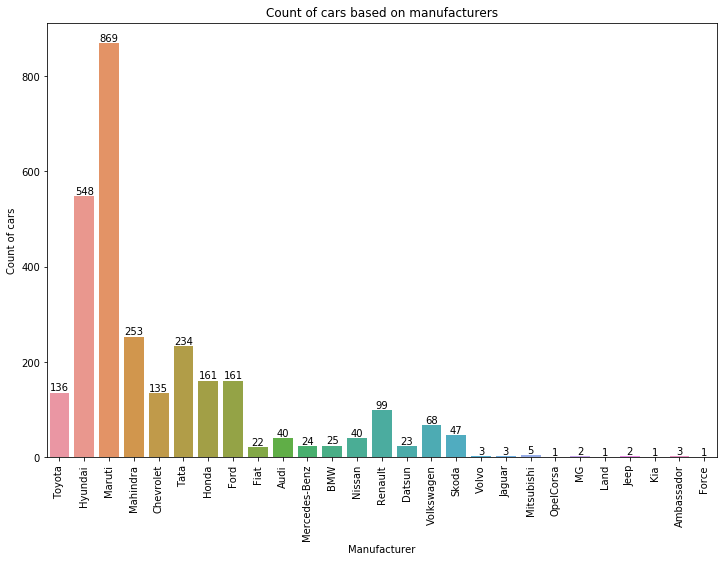

In [16]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Maximum cars in the dataset are by the manufacturer Maruti and there are no null values.

I'll also drop the Name column.

In [17]:
X_train.drop("name", axis = 1, inplace = True)
X_test.drop("name", axis = 1, inplace = True)

C:\Users\Nitin\anaconda3 new\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Year

In [18]:
curr_time = datetime.datetime.now()
X_train['year'] = X_train['year'].apply(lambda x : curr_time.year - x)
X_test['year'] = X_test['year'].apply(lambda x : curr_time.year - x)

C:\Users\Nitin\anaconda3 new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Nitin\anaconda3 new\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
X_train

,year,km_driven,fuel,seller_type,transmission,owner,Manufacturer
3679,15,400000,Diesel,Individual,Manual,Third Owner,Toyota
2093,6,50000,Petrol,Dealer,Automatic,First Owner,Hyundai
3220,2,20000,Petrol,Individual,Manual,First Owner,Maruti
2422,4,80000,Diesel,Individual,Manual,First Owner,Mahindra
1867,16,100000,Petrol,Individual,Manual,Third Owner,Maruti
...,...,...,...,...,...,...,...
3444,15,50000,Diesel,Individual,Manual,First Owner,Toyota
466,10,80000,Diesel,Individual,Manual,First Owner,Tata
3092,5,51000,Diesel,Dealer,Manual,First Owner,Maruti
3772,8,80000,Diesel,Individual,Manual,First Owner,Maruti


Now that we have worked with the training data, let's create dummy columns for categorical columns before we begin training.

### Categorical Values

In [ ]:
X_train = pd.get_dummies(X_train,columns = [ "fuel", "transmission", "owner","seller_type","Manufacturer"],drop_first = True)


In [21]:
X_train

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,...,Manufacturer_Mercedes-Benz,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_OpelCorsa,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
3679,15,400000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2093,6,50000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3220,2,20000,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2422,4,80000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1867,16,100000,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,15,50000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
466,10,80000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3092,5,51000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3772,8,80000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_test = pd.get_dummies(X_test,columns = ["Manufacturer", "fuel", "transmission", "owner","seller_type"],drop_first = True)


In [23]:
X_test

,year,km_driven,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Chevrolet,Manufacturer_Daewoo,Manufacturer_Datsun,Manufacturer_Fiat,Manufacturer_Ford,Manufacturer_Honda,...,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Individual,seller_type_Trustmark Dealer
3978,11,80000,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1448,2,27000,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2664,13,41723,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
17,7,141000,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
1634,5,60000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,3,10000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4278,1,1000,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
288,10,90000,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1615,4,46507,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [24]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Scaling 

In [25]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

# Linear Regression

In [26]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.6250075640260746

In [28]:
linearRegression.coef_

array([-157505.46927211,  -48758.51001122,  102297.5438152 ,
         -8267.90082105,    4513.74447363,    4993.18106232,
        -92195.13967319,     212.93331101,  -13662.23680217,
         11069.08621698,  -10973.09044896,    -805.03694   ,
         39755.29004177,  120562.51343103,  192755.81659084,
        -35490.34033938,  -19188.1545574 ,  -12865.91526762,
         -4859.0541353 ,    1847.97911712,    7765.50841395,
        -12003.08304866,   53064.67788706,   22648.00028404,
          3272.4547184 ,   58742.55380818,   25459.57340797,
         13504.23364651,  -27767.66365091,  204427.59593875,
         18890.76127258,   -6041.10162886,    3270.75617939,
        -23449.90482206,   -6802.49394327,  -40011.91625108,
         85462.28250292,  -11236.5136628 ,   61495.96146619])

In [37]:
y_pred

array([166249.17857143, 387092.85285714, 126860.        , ...,
       438949.44      , 601700.        , 525780.83333333])

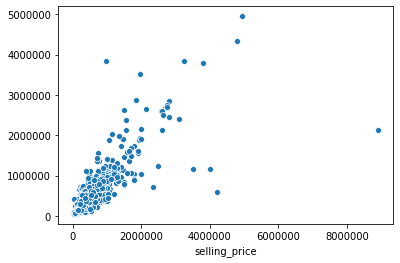

In [29]:
sns.scatterplot(y_test,y_pred)

In [30]:
linearRegression.score(X_test,y_test)

0.6250075640260746

# Random Forest Regression

In [32]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
r2_score(y_test, y_pred2)

0.7405270636032415

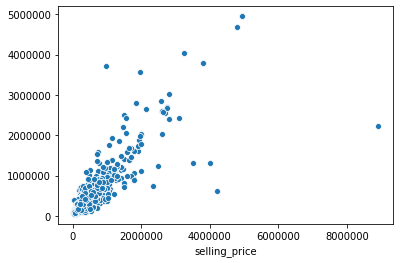

In [33]:
sns.scatterplot(y_test,y_pred2)

# Decision-Tree Regression

In [35]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred3 = rf.predict(X_test)
r2_score(y_test, y_pred3)

0.7405270636032415

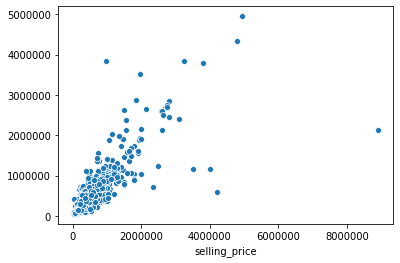

In [36]:
sns.scatterplot(y_test,y_pred)

# SVR

In [38]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)
y_pred4 = rf.predict(X_test)
r2_score(y_test, y_pred4)

0.7405270636032415

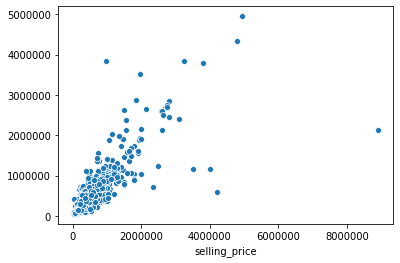

In [39]:
sns.scatterplot(y_test,y_pred)